
Exercise: Credit Cards

    Due No Due Date Points 10 Submitting a website url

Download this dataset from Kaggle (Links to an external site.) and use the K-Means Clustering algorithm to explore patterns in the dataset. Choose a few features (2~4) of the dataset to compare (for example, what do the clustering patterns of credit limit vs balance look like?, etc.) and feel free to try out different numbers of clusters. Try to discover what makes each cluster distinct from another (clusters of low balance vs high balance? Are there groups of certain credit limits?, etc.). Use visualization if needed to identify trends in this data.

Upload your Jupyter notebook to Github and submit the URL to turn in this assignment.

In [2]:
from sklearn.cluster import KMeans

import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

%matplotlib inline

In [6]:
# read file into dataframe
filepath = "datasets/credit_card.csv"

df = pd.read_csv(filepath)
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [7]:
df.shape

(8950, 18)

In [8]:
#these will be used in the analysis 
df= df[['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT']]
df.head()

,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT
0,40.900749,95.40,0.000000,1000.0
1,3202.467416,0.00,6442.945483,7000.0
2,2495.148862,773.17,0.000000,7500.0
3,1666.670542,1499.00,205.788017,7500.0
4,817.714335,16.00,0.000000,1200.0


In [9]:
df.shape

(8950, 4)

In [10]:
df.dtypes

BALANCE         float64
PURCHASES       float64
CASH_ADVANCE    float64
CREDIT_LIMIT    float64
dtype: object

In [11]:
df.isnull().sum()

BALANCE         0
PURCHASES       0
CASH_ADVANCE    0
CREDIT_LIMIT    1
dtype: int64

In [14]:
df.dropna(subset=['CREDIT_LIMIT'],inplace = True)
len(df)

8949

In [15]:
df.describe()

,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT
count,8949.000000,8949.000000,8949.000000,8949.000000
mean,1564.647593,1003.316936,978.959616,4494.449450
std,2081.584016,2136.727848,2097.264344,3638.815725
min,0.000000,0.000000,0.000000,50.000000
25%,128.365782,39.800000,0.000000,1600.000000
50%,873.680279,361.490000,0.000000,3000.000000
75%,2054.372848,1110.170000,1113.868654,6500.000000
max,19043.138560,49039.570000,47137.211760,30000.000000


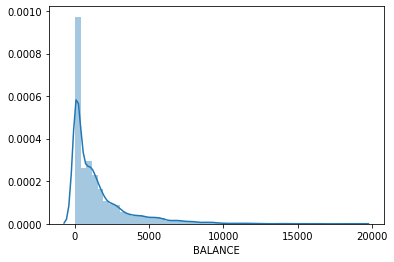

In [17]:
sns.distplot(df['BALANCE'])

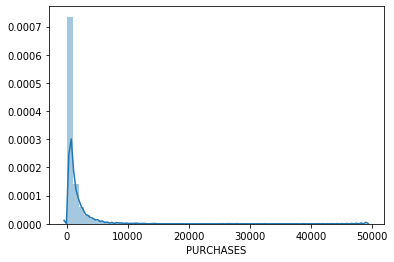

In [18]:
sns.distplot(df['PURCHASES'])

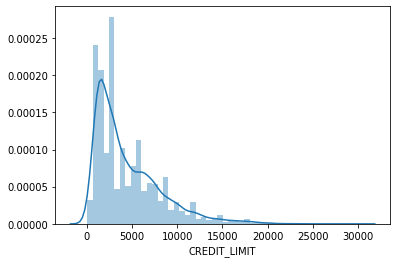

In [19]:
sns.distplot(df['CREDIT_LIMIT'])

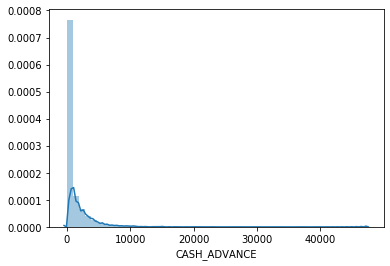

In [20]:
sns.distplot(df['CASH_ADVANCE'])

In [23]:
#function to assign credit limit groups

def credit_groups(credit):
    if credit < 3500:
        group = 'low credit limit'
    elif credit <=5500:
        group = 'medium credit limit'
    else: 
        group = 'high credit limit'
        
    return group



In [24]:
#use function on 'credit_limit' column

df['credit_groups'] = df['CREDIT_LIMIT'].apply(credit_groups)

In [25]:
df.head()

,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,credit_groups
0,40.900749,95.40,0.000000,1000.0,low credit limit
1,3202.467416,0.00,6442.945483,7000.0,high credit limit
2,2495.148862,773.17,0.000000,7500.0,high credit limit
3,1666.670542,1499.00,205.788017,7500.0,high credit limit
4,817.714335,16.00,0.000000,1200.0,low credit limit


In [28]:
def balance_groups(balance):
    if balance < 1565:
        group = 'low balance'
    else:
        group = 'high balance'
    
    return group

In [29]:
df['balance_groups'] = df['BALANCE'].apply(balance_groups)

In [30]:
df.head()

,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,credit_groups,balance_groups
0,40.900749,95.40,0.000000,1000.0,low credit limit,low balance
1,3202.467416,0.00,6442.945483,7000.0,high credit limit,high balance
2,2495.148862,773.17,0.000000,7500.0,high credit limit,high balance
3,1666.670542,1499.00,205.788017,7500.0,high credit limit,high balance
4,817.714335,16.00,0.000000,1200.0,low credit limit,low balance


In [33]:
index_val = ['balance_groups', 'credit_groups']

#mean average purchases by credit group, and balance group
pd.pivot_table(data=df, index=index_val, values = ['PURCHASES'])

PURCHASES
balance_groups credit_groups                   
high balance   high credit limit    1998.813974
               low credit limit      484.629604
               medium credit limit   879.826773
low balance    high credit limit    1611.546031
               low credit limit      519.272607
               medium credit limit  1078.680261

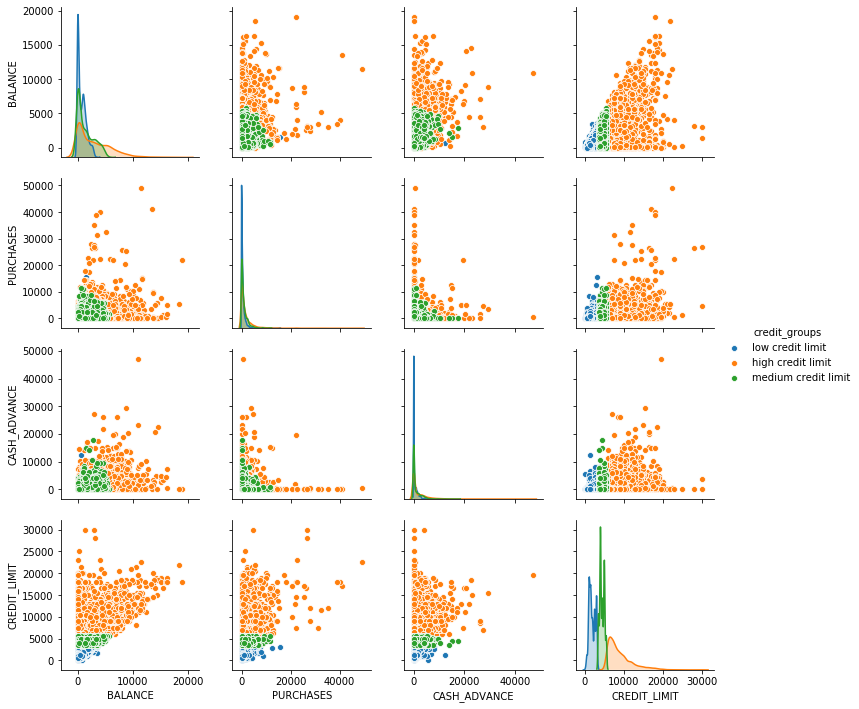

In [34]:
#compare balance and purchases by credit group

sns.pairplot (data= df, hue = 'credit_groups')

K-means model

In [35]:
# dataframe that will be used in algorithm
X = df[['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT']]
X.head()

,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT
0,40.900749,95.40,0.000000,1000.0
1,3202.467416,0.00,6442.945483,7000.0
2,2495.148862,773.17,0.000000,7500.0
3,1666.670542,1499.00,205.788017,7500.0
4,817.714335,16.00,0.000000,1200.0


In [36]:
kmeans = KMeans(n_clusters=3)

In [37]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [38]:
# centroid row position DOES NOT MATTER
# centroid columns are in order of dataframe columns index(0=Age, 1=Income, 2=Score)
kmeans.cluster_centers_

array([[ 1986.09314901,  1393.94137103,  1117.92568712,  7022.57587494],
       [ 5723.62998764,  3005.99317708,  4014.92811334, 12423.828125  ],
       [  799.81978317,   548.47720664,   498.4391299 ,  2240.94252942]])

In [39]:
# create column in original dataframe with cluster group number
df['cluster'] = kmeans.labels_
df.head()

,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,credit_groups,balance_groups,cluster
0,40.900749,95.40,0.000000,1000.0,low credit limit,low balance,2
1,3202.467416,0.00,6442.945483,7000.0,high credit limit,high balance,0
2,2495.148862,773.17,0.000000,7500.0,high credit limit,high balance,0
3,1666.670542,1499.00,205.788017,7500.0,high credit limit,high balance,0
4,817.714335,16.00,0.000000,1200.0,low credit limit,low balance,2


C:\Users\Million\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Million\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


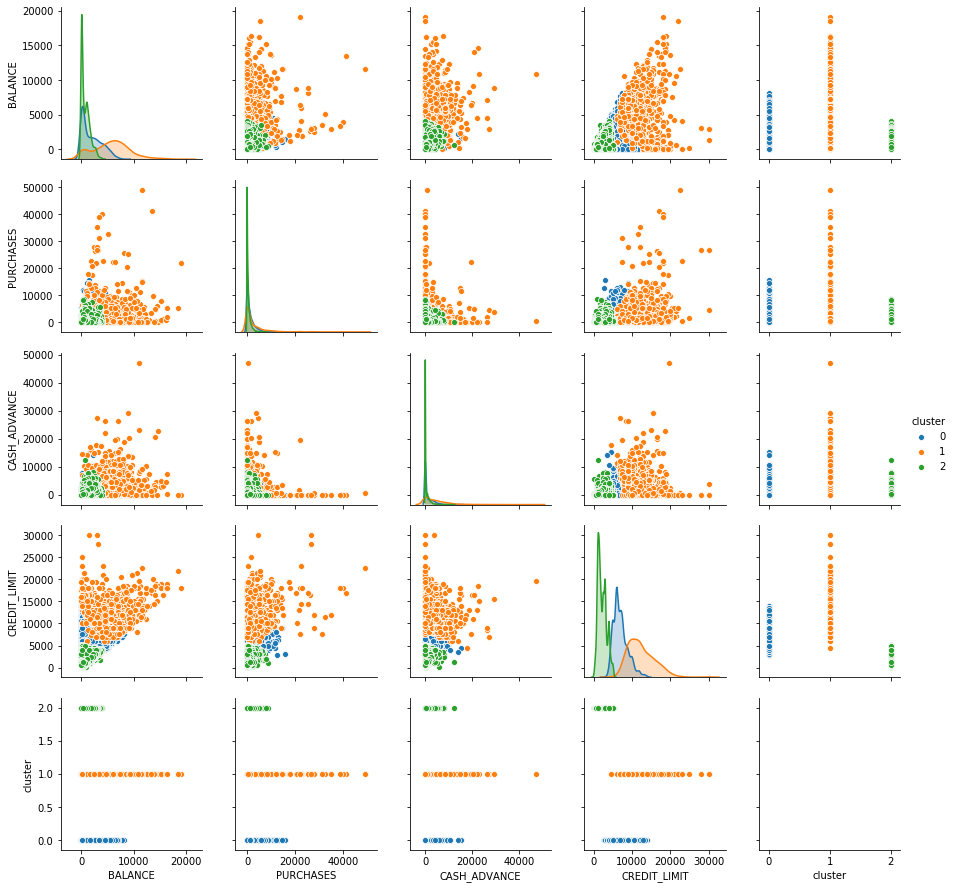

In [40]:
# compare all numerical features by cluster group
sns.pairplot(data=df, hue='cluster')

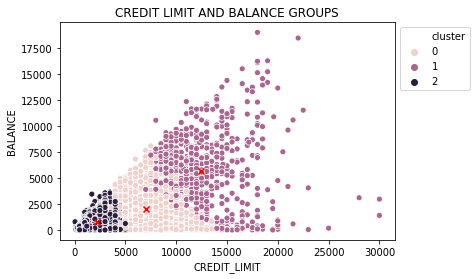

In [41]:

#COMPARE CREDIT LIMIT AND BALANCE

sns.scatterplot(data=df, x='CREDIT_LIMIT', y='BALANCE', hue='cluster')

# scatterplot of centroid coordinates for income and spending score
plt.scatter(kmeans.cluster_centers_[:, 3], kmeans.cluster_centers_[:, 0], c='red', marker='x')

plt.title("CREDIT LIMIT AND BALANCE GROUPS")
#put the legend on the right
plt.legend(bbox_to_anchor=(1,1), loc=2)

In [42]:
df['cluster'].unique()

array([2, 0, 1], dtype=int64)

In [43]:
# select a cluster from dataframe
cluster = df.loc[df['cluster'] == 0]
cluster.head()

,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,credit_groups,balance_groups,cluster
1,3202.467416,0.00,6442.945483,7000.0,high credit limit,high balance,0
2,2495.148862,773.17,0.000000,7500.0,high credit limit,high balance,0
3,1666.670542,1499.00,205.788017,7500.0,high credit limit,high balance,0
8,1014.926473,861.49,0.000000,7000.0,high credit limit,low balance,0
9,152.225975,1281.60,0.000000,11000.0,high credit limit,low balance,0


In [44]:
# number of customers in this cluster
len(cluster)

2581

In [45]:
# descriptive statistics for this cluster
cluster.describe()

,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,cluster
count,2581.000000,2581.000000,2581.000000,2581.000000,2581.0
mean,1987.035018,1393.923832,1120.199337,7025.412983,0.0
std,1861.048152,1865.659123,1794.755381,1867.769802,0.0
min,0.000000,0.000000,0.000000,2800.000000,0.0
25%,253.143106,117.000000,0.000000,6000.000000,0.0
50%,1527.905897,739.440000,0.000000,6500.000000,0.0
75%,3322.674158,1961.780000,1883.483223,8000.000000,0.0
max,8097.334733,15704.040000,15084.008520,14000.000000,0.0


In [46]:
cluster1 = df.loc[df['cluster'] == 1]
cluster1.head()

,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,credit_groups,balance_groups,cluster
6,627.260806,7091.01,0.000000,13500.0,high credit limit,low balance,1
15,6886.213231,1611.70,2301.491267,8000.0,high credit limit,high balance,1
18,1989.072228,504.35,0.000000,13000.0,high credit limit,high balance,1
21,6369.531318,6359.95,229.028245,11250.0,high credit limit,high balance,1
23,3800.151377,4248.35,7974.415626,9000.0,high credit limit,high balance,1


In [47]:
len(cluster1)

767

In [48]:
cluster2 = df.loc[df['cluster'] == 2]

In [50]:
# sort the cluster numbers from min(0) to max(2)
sorted_clusters = sorted(df['cluster'].unique())

# select the rows of the same cluster number
# then get min/max income and average spending score
print("Cluster credit limit Ranges\n")
for cluster_num in sorted_clusters:
    small_df = df.loc[df['cluster'] == cluster_num]
    
    min_credit = small_df['CREDIT_LIMIT'].min()
    max_credit = small_df['CREDIT_LIMIT'].max()
    avg_balance = small_df['BALANCE'].mean()
    
    print(f"Cluster {cluster_num}: ${min_credit}-{max_credit}K, avg balance: {int(avg_balance)}")

Cluster credit limit Ranges

Cluster 0: $2800.0-14000.0K, avg balance: 1987
Cluster 1: $4500.0-30000.0K, avg balance: 5727
Cluster 2: $50.0-5200.0K, avg balance: 799


In [52]:
# sort the cluster numbers from min(0) to max(2)
#cahs advance
sorted_clusters = sorted(df['cluster'].unique())

# select the rows of the same cluster number
# then get min/max income and average spending score
print("Cluster credit limit Ranges\n")
for cluster_num in sorted_clusters:
    small_df = df.loc[df['cluster'] == cluster_num]
    
    min_credit = small_df['CREDIT_LIMIT'].min()
    max_credit = small_df['CREDIT_LIMIT'].max()
    avg_cashadvance = small_df['CASH_ADVANCE'].mean()
    
    print(f"Cluster {cluster_num}: ${min_credit}-{max_credit}K, avg cash advance: {int(avg_cashadvance)}")

Cluster credit limit Ranges

Cluster 0: $2800.0-14000.0K, avg cash advance: 1120
Cluster 1: $4500.0-30000.0K, avg cash advance: 4013
Cluster 2: $50.0-5200.0K, avg cash advance: 498


group 1: custoemr with median credit limit, carry a median balance, and take an avg cash avance of 1120
group 2: costomer with low credit limit, carry a low balance, and take an avg cash advance of 498
group 3; customer with high credit limit, carry a high balance, and take an avg cash advbance of 4013